<a href="https://colab.research.google.com/github/Chabachib/GoogleColab-Notebooks/blob/main/Histogramme_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ChatGPT

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Question 1 : Charger une image en niveaux de gris (lena ou kameraman).

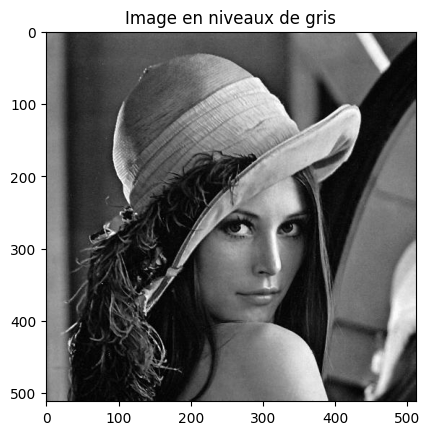

In [7]:
image = cv2.imread('lenna.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Image en niveaux de gris')
plt.show()

### Question 2 : Calculer et afficher l'histogramme de cette image.

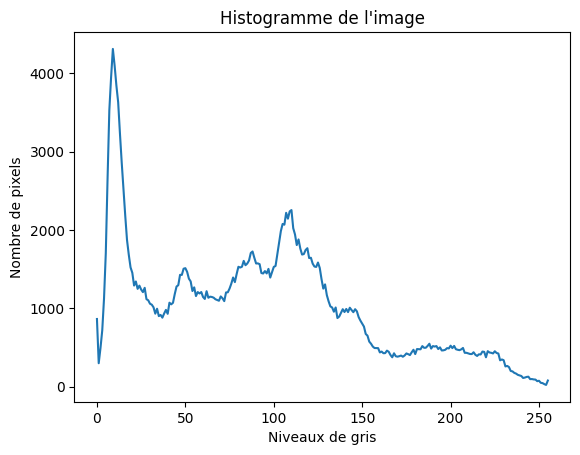

In [8]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.plot(histogram)
plt.title('Histogramme de l\'image')
plt.xlabel('Niveaux de gris')
plt.ylabel('Nombre de pixels')
plt.show()

### Question 3 : Interpréter l'histogramme (répartition des tons sombres et clairs).

***Interpretation :*** Il y a un grand nombre de pixels qui ont des valeurs tres proches de la valeur 0 (Couleur Noir), ce signifie qu'il y a beaucoup de pixels sombres dans l'image, par contre vers la droite, on distingue qu'il n y'a pas beaucoup de pixels qui ont des valeurs proches de la valeur 255 (Couleur Blanc), ce qui signifie qu'il n y'a pas beaucoup de pixels claires dans l'image.

Conclusion : Les tons sombres sont predominants par rapport aux tons claires, du coup, L'image est sombre.

### Question 4 : Appliquer l'égalisation d'histogramme sur une image en niveaux de gris.

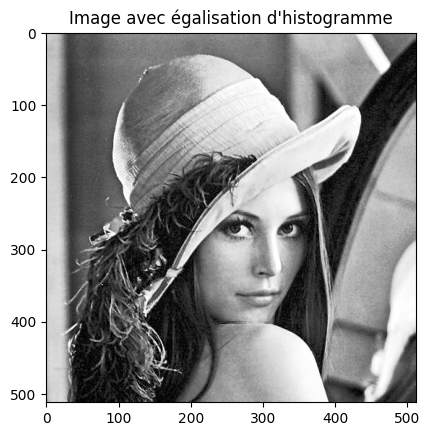

In [9]:
image_eq = cv2.equalizeHist(image)

plt.imshow(image_eq, cmap='gray')
plt.title('Image avec égalisation d\'histogramme')
plt.show()

### Question 5 : Comparer l'image originale avec l'image améliorée.

In [10]:
equa_hist = cv2.calcHist([image_eq], [0], None, [256], [0, 256])

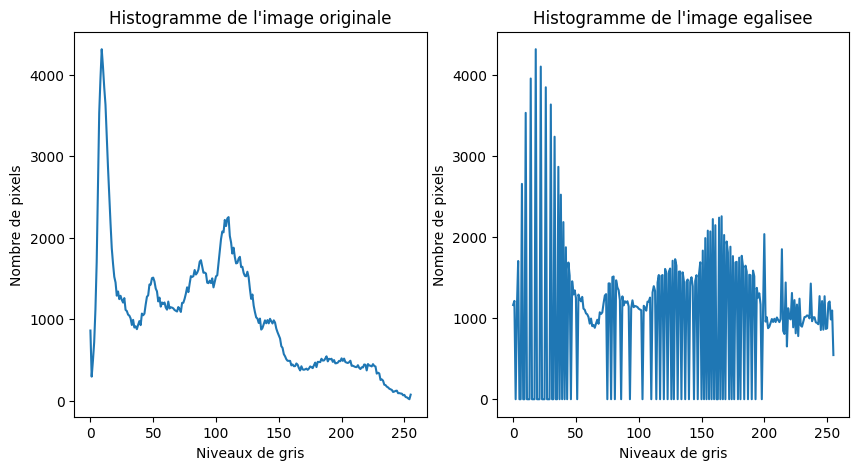

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(histogram)
plt.title('Histogramme de l\'image originale')
plt.xlabel('Niveaux de gris')
plt.ylabel('Nombre de pixels')

plt.subplot(1, 2, 2)
plt.plot(equa_hist)
plt.title('Histogramme de l\'image egalisee')
plt.xlabel('Niveaux de gris')
plt.ylabel('Nombre de pixels')

plt.show()

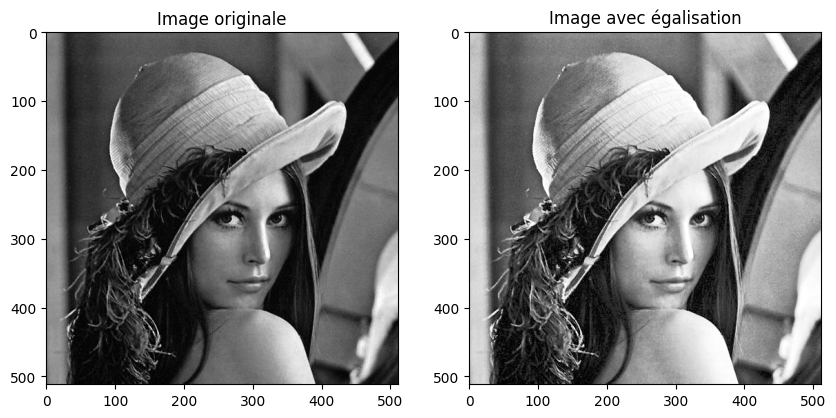

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Image originale')

axs[1].imshow(image_eq, cmap='gray')
axs[1].set_title('Image avec égalisation')

plt.show()

### Question 6 : Appliquer un seuillage binaire global avec un seuil fixé à 127.

In [18]:
_, image_binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

### Question 7 : Afficher l'image binaire obtenue.

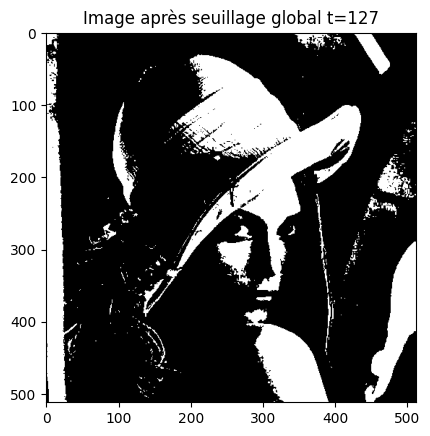

In [19]:
plt.imshow(image_binary, cmap='gray')
plt.title('Image après seuillage global t=127')
plt.show()

### Question 8 :	Appliquer un seuillage adaptatif à l'image.



In [20]:
image_adapt_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

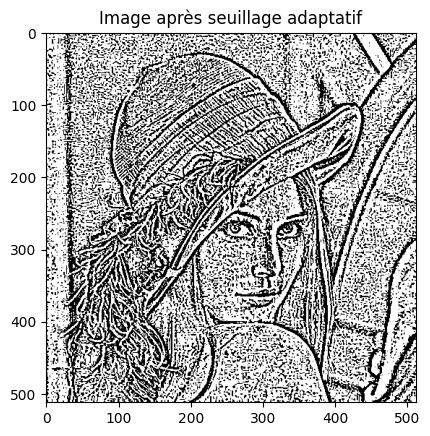

In [21]:
plt.imshow(image_adapt_thresh, cmap='gray')
plt.title('Image après seuillage adaptatif')
plt.show()

### Question 9 : Comparer avec le seuillage global.

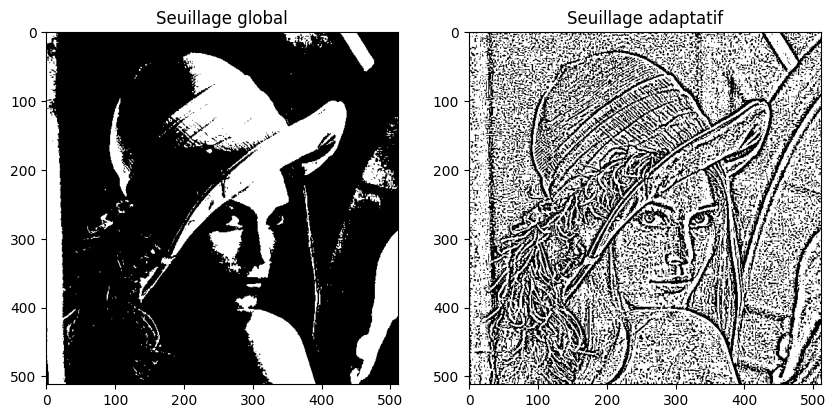

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image_binary, cmap='gray')
axs[0].set_title('Seuillage global')

axs[1].imshow(image_adapt_thresh, cmap='gray')
axs[1].set_title('Seuillage adaptatif')

plt.show()

### Question 10 : Discuter des différences de contraste avant et après égalisation.

***Interpretation :*** Apres avoir realiser l'egalisation de l'image, On a plotte les 2 histogrammes des 2 images, avant et apres l'egalisation, on peut dire que, avant l'egalisation de l'histogramme, il etait de type : Low constrast, ce qui signifie que l'image se concentre sur un seul ton, soit sombre ou claire, dans notre cas, c'est un ton sombre, par contre, une fois qu'on a egalise l'image, d'apres son histogramme, on realise que la distribution des intensites est devenu plus correcte, d'ou l'histogramme est de type high contrast.


### Question 11 :	Interpréter les différences entre le seuillage global et adaptatif en fonction de l'éclairage et des détails de l'image.

***Interpretation :*** On a applique un seuillage global de valeur 127, ce qui a entrainer la perte de quelques details, par contre le seuillage adaptif adapte son seuillage en fonction des valeurs des voisinages, ce qui a permis de conserver les details de l'images, dans notre cas, on peut dire, que le seuillage adaptif est plus efficace que le seuillage global.